In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

In [2]:
data = pd.read_csv('CC GENERAL.csv')

# The customer ID is removed since it does not contain useful information
df = data.iloc[:, 1:]

In [3]:
# Preview of the data contents
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
# Summary statistics of all features within the data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# These are the columns that seem to have extreme values compared to the rest of the data
high_vals = ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

In [6]:
# Count of all NaN values in the data for each column
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

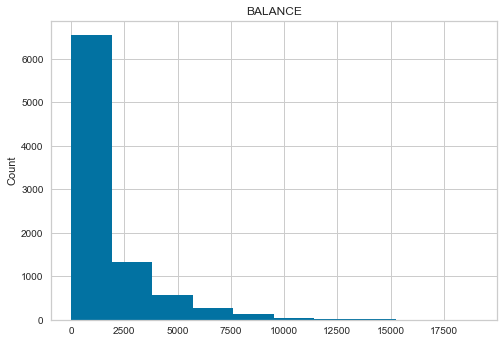

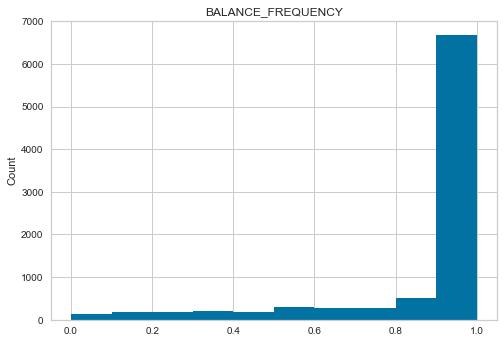

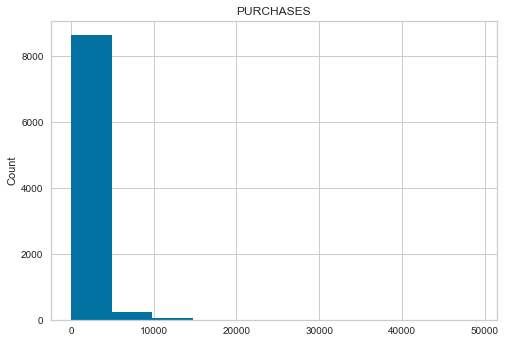

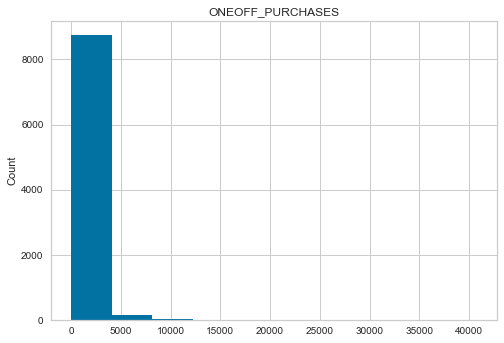

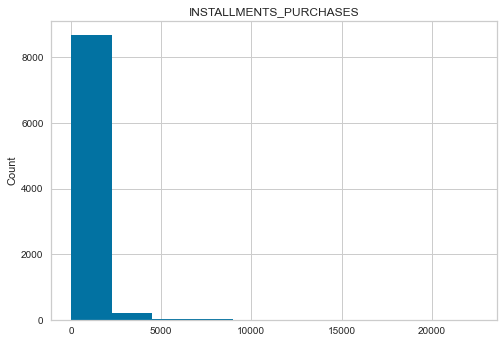

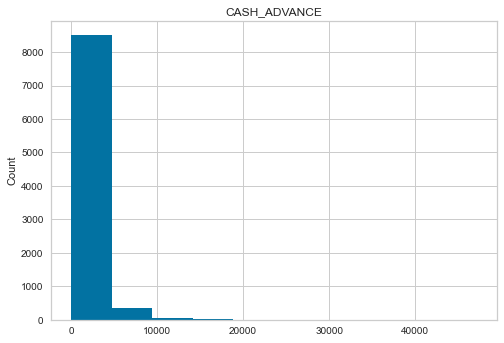

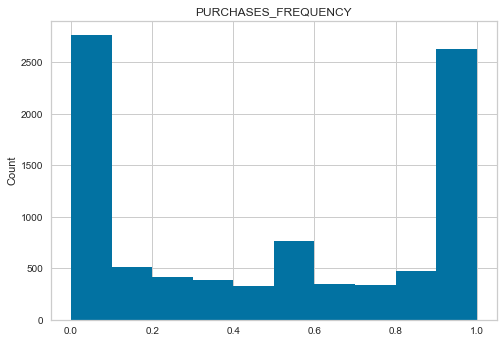

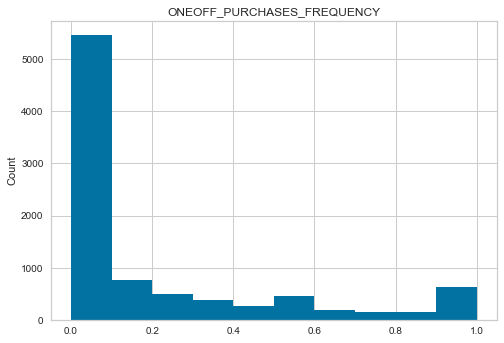

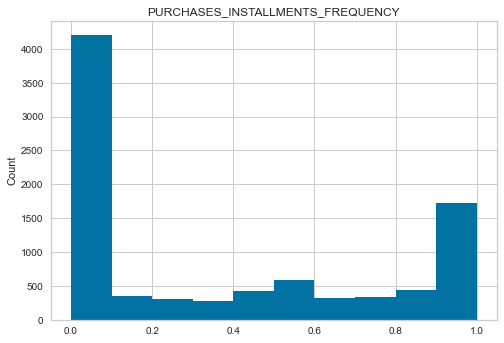

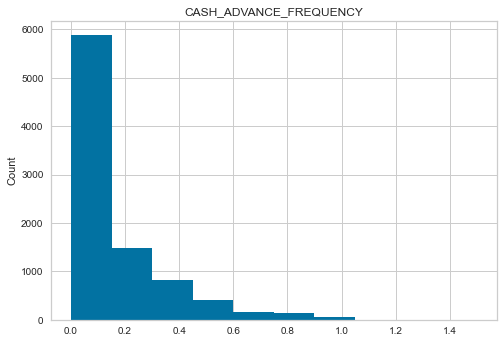

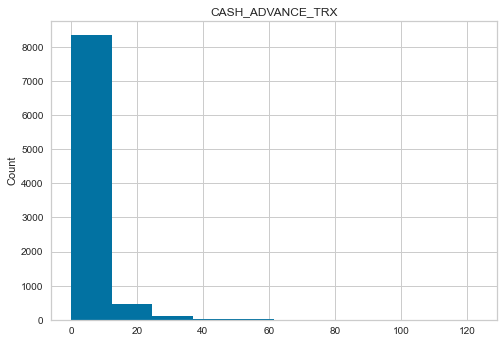

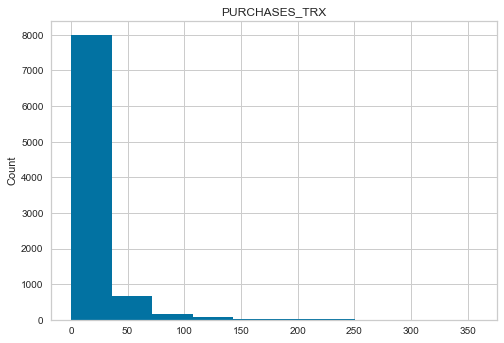

C:\Programming\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Programming\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


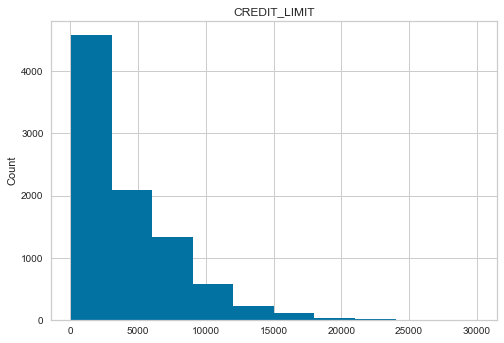

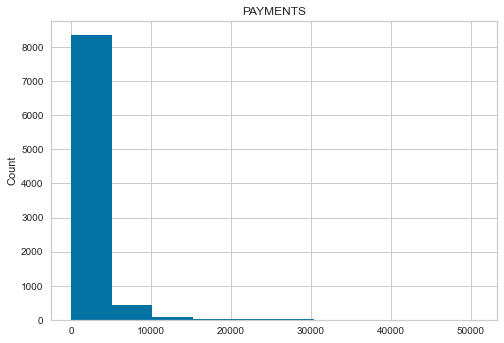

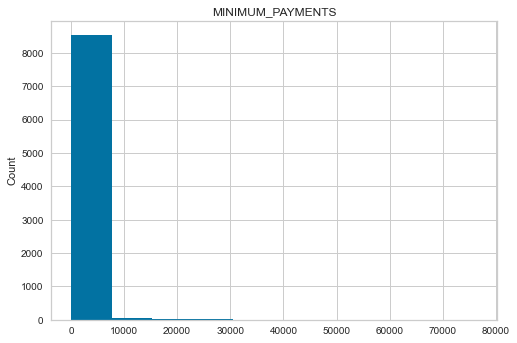

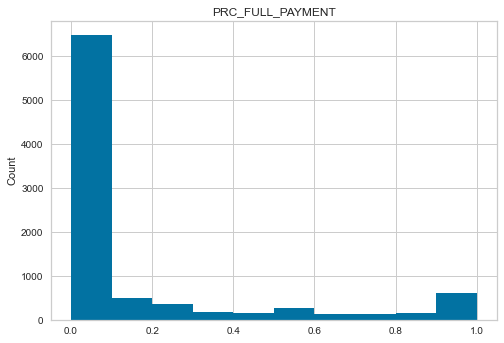

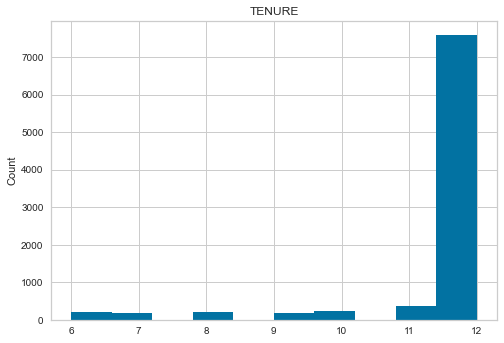

In [8]:
# Quick visuals for the distributions of the data
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.ylabel('Count')
    plt.show()

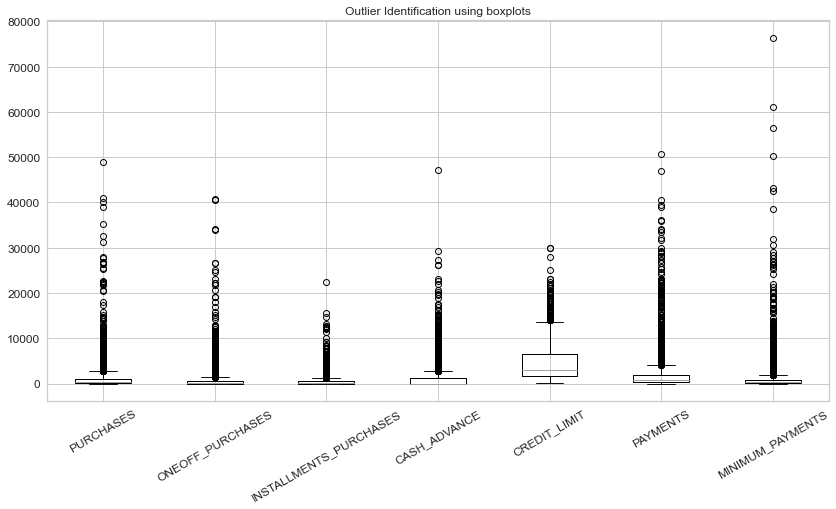

In [7]:
# a boxplot of the variables with the most extreme values
plt.figure(figsize = (14,7))
plt.title('Outlier Identification using boxplots')
df.boxplot(column = high_vals, rot = 30, fontsize = 12)
plt.savefig('cc_boxplot.jpg')

In [8]:
# detecting outliers using traditional methods
iqr_outliers = []
for col in df.columns:
    if df[col].max() > 12:
        q3, q1 = np.nanpercentile(df[col], [75, 25])
        iqr = q3 - q1
        up_threshold = (1.5 * iqr) + q3
        dn_threshold = q1 - (1.5 * iqr)
        iqr_outliers.extend(df[df[col] > up_threshold].index)
    
iqr_outliers = list(dict.fromkeys(iqr_outliers))

In [9]:
# Using the traditional definition of outliers would remove far too many observations from the group
len(iqr_outliers)

3404

In [10]:
# removing outliers by setting custom thresholds after examinination of distant points in boxplot data
df2 = df.copy()
df2 = df2[(df2['PURCHASES'] < 45000) & (df2['ONEOFF_PURCHASES'] < 40000) & (df2['INSTALLMENTS_PURCHASES'] < 20000) & (df2['CASH_ADVANCE'] < 40000) ]
df2 = df2[(df2['PAYMENTS'] < 45000) & (df2['MINIMUM_PAYMENTS'] < 35000)]

In [11]:
len(df2)

8625

In [12]:
# skew of all the variables in the dataset
df.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [13]:
# absolute change in skew after removal of outlier data
df.skew().abs() - df2.skew().abs()

BALANCE                             0.020995
BALANCE_FREQUENCY                  -0.059842
PURCHASES                           1.033153
ONEOFF_PURCHASES                    1.593082
INSTALLMENTS_PURCHASES              1.054002
CASH_ADVANCE                        0.862990
PURCHASES_FREQUENCY                 0.026379
ONEOFF_PURCHASES_FREQUENCY          0.031534
PURCHASES_INSTALLMENTS_FREQUENCY    0.020478
CASH_ADVANCE_FREQUENCY              0.036252
CASH_ADVANCE_TRX                    0.369059
PURCHASES_TRX                       0.034939
CREDIT_LIMIT                        0.030503
PAYMENTS                            0.699608
MINIMUM_PAYMENTS                    5.363880
PRC_FULL_PAYMENT                    0.058593
TENURE                             -0.063505
dtype: float64

In [14]:
# kurtosis values for all variables in the dataset
df.kurtosis()

BALANCE                               7.674751
BALANCE_FREQUENCY                     3.092370
PURCHASES                           111.388771
ONEOFF_PURCHASES                    164.187572
INSTALLMENTS_PURCHASES               96.575178
CASH_ADVANCE                         52.899434
PURCHASES_FREQUENCY                  -1.638631
ONEOFF_PURCHASES_FREQUENCY            1.161846
PURCHASES_INSTALLMENTS_FREQUENCY     -1.398632
CASH_ADVANCE_FREQUENCY                3.334734
CASH_ADVANCE_TRX                     61.646862
PURCHASES_TRX                        34.793100
CREDIT_LIMIT                          2.836656
PAYMENTS                             54.770736
MINIMUM_PAYMENTS                    283.989986
PRC_FULL_PAYMENT                      2.432395
TENURE                                7.694823
dtype: float64

In [15]:
# absolute change in kurtosis after removal of outlier data
df.kurtosis().abs() - df2.kurtosis().abs()

BALANCE                               0.086989
BALANCE_FREQUENCY                    -0.272397
PURCHASES                            26.352079
ONEOFF_PURCHASES                     47.871007
INSTALLMENTS_PURCHASES               31.418130
CASH_ADVANCE                         23.173637
PURCHASES_FREQUENCY                   0.000768
ONEOFF_PURCHASES_FREQUENCY            0.103803
PURCHASES_INSTALLMENTS_FREQUENCY     -0.019646
CASH_ADVANCE_FREQUENCY                0.166958
CASH_ADVANCE_TRX                      7.755507
PURCHASES_TRX                         0.435934
CREDIT_LIMIT                          0.140820
PAYMENTS                             13.638216
MINIMUM_PAYMENTS                    190.298989
PRC_FULL_PAYMENT                      0.238369
TENURE                               -0.430501
dtype: float64

In [16]:
clm = df2.CREDIT_LIMIT.median()
df2.CREDIT_LIMIT.fillna(clm, inplace = True)

In [17]:
df2.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [18]:
# scaling of the data and dimensionality reduction through PCA
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df2)
pca = PCA(svd_solver = 'full', n_components = 'mle')
scaled_df_pca = pca.fit_transform(scaled_df)
print("Original number of features:", scaled_df.shape[1])
print("Reduced number of features:", scaled_df_pca.shape[1])

Original number of features: 17
Reduced number of features: 16


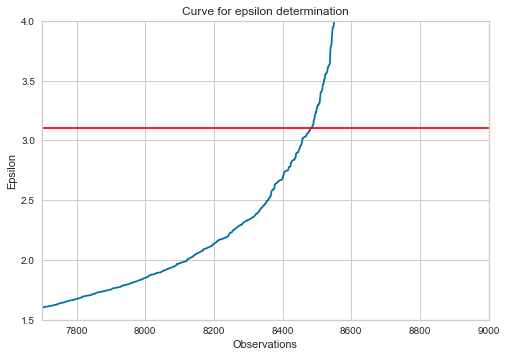

In [20]:
# 
neigh = NearestNeighbors(n_neighbors=34)
nbrs = neigh.fit(scaled_df_pca)
distances, indices = nbrs.kneighbors(scaled_df_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axis([7700, 9000, 1.5, 4])
plt.axhline(3.1, color = 'red')
plt.ylabel('Epsilon')
plt.xlabel('Observations')
plt.title('Curve for epsilon determination')
plt.savefig('cc_epsilon.jpg')

In [21]:
db = DBSCAN(eps = 3.1, min_samples = 32, n_jobs = -1).fit(scaled_df_pca)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)
sil_score = silhouette_score(scaled_df_pca, labels)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
print('Silhouette Score of model: %0.3f' % sil_score)
print('Labels:', np.unique(labels))

Estimated no. of clusters: 2
Estimated no. of noise points: 294
Silhouette Score of model: 0.580
Labels: [-1  0]


In [22]:
kmeans_scores = {}
num_clusters = range(2, 20)
for k in num_clusters:
    kmeans = KMeans(n_clusters = k, random_state = 98564)
    kmeans.fit(scaled_df_pca)
    labels = kmeans.labels_
    sil_score = silhouette_score(scaled_df_pca, labels)
    kmeans_scores[k] = sil_score

In [23]:
kmeans_scores

{2: 0.20743270750641069,
 3: 0.250678149097285,
 4: 0.19494784847915503,
 5: 0.1928009914605756,
 6: 0.20650456421512953,
 7: 0.2101095052732436,
 8: 0.22410770657577572,
 9: 0.2172354997655623,
 10: 0.21958591296991317,
 11: 0.2167273037920517,
 12: 0.22015577924844565,
 13: 0.21732611575189248,
 14: 0.21844861894501882,
 15: 0.20178133640715273,
 16: 0.2053641732487099,
 17: 0.2049449960835352,
 18: 0.20412210897535976,
 19: 0.1734159655112307}

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 8625 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

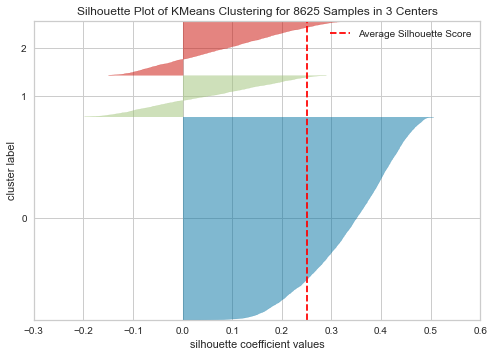

In [25]:
kmeans_9 = KMeans(n_clusters = 3, random_state = 123)
visualizer = SilhouetteVisualizer(kmeans_9, colors = 'yellowbrick')
visualizer.fit(scaled_df_pca)
visualizer.show('cc_silhouette.jpg')

In [27]:
df2['cluster'] = visualizer.labels_

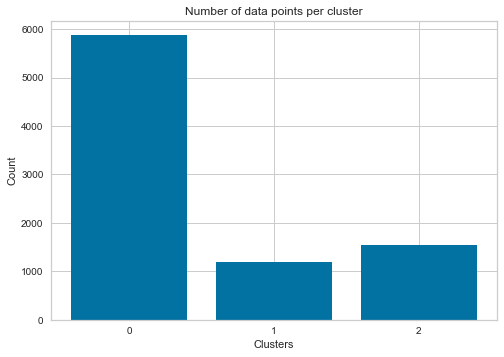

In [28]:
plt.title('Number of data points per cluster')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
plt.bar(df2.cluster.value_counts().index, df2.cluster.value_counts().values)
plt.savefig('cc_cluster_count.jpg')

In [29]:
silhouette_score(scaled_df_pca, visualizer.labels_)

0.25117816881226984

In [30]:
df2.cluster.describe()

count    8625.000000
mean        0.498783
std         0.781292
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: cluster, dtype: float64

In [31]:
df2.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        5877.0   827.411365   960.951321   0.000000    68.208380   
1        1194.0  2182.571084  2534.779893  12.423203   364.110499   
2        1554.0  4035.733695  2678.886187   4.382924  1919.185023   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0         471.274037  1271.429631   5941.271179            5877.0  0.859956   
1        1196.599829  3128.228390  19043.138560            1194.0  0.982440   
2        3516.070322  5602.772482  16304.889250            1554.0  0.959906   

         ... PRC_FULL_PAYMENT       TENURE                                  \
         ...              75%  max   count       mean       std  min   25%   
cluster  ...                                                                 
0        ...         0.181818  1.0  5877.0  11.498384  1.358058  6.0  12.0   
1        ...         0.666667  1.0  1194.0  11.920436  0.541211  6.0  12.0   
2        ...         0.000000  1.0  1554.0  11.366795  1.491104  6.0  12.0   

                           
          50%   75%   max  
cluster                    
0        12.0  12.0  12.0  
1        12.0  12.0  12.0  
2        12.0  12.0  12.0  

[3 rows x 136 columns]

In [47]:
pca2 = PCA(svd_solver = 'full', n_components = 2)
df2_pca = pca2.fit_transform(scaled_df)
df2_pca

array([[-1.70698192, -1.18493342],
       [-1.26375649,  2.4644447 ],
       [ 0.93642358, -0.36741999],
       ...,
       [-0.92859675, -1.88871653],
       [-2.3707811 , -0.80709772],
       [-0.57945379, -0.50193768]])

In [48]:
df3 = pd.DataFrame(df2_pca, columns = ['pca1', 'pca2'])
df3['cluster'] = visualizer.labels_

<AxesSubplot:xlabel='pca1', ylabel='pca2'>

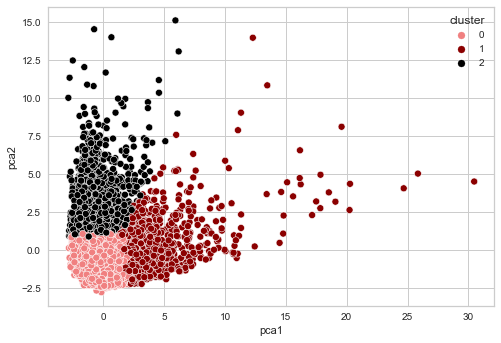

In [49]:
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = df3, palette = ['lightcoral', 'darkred', 'black'])